In [1]:
# TODO: Sort by order
from scipy.stats import ranksums, ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>3.a</b>

In [2]:
sns.set_theme(style="ticks", palette="pastel")

In [3]:
# Does he mind if I use the transpose matrix or the normal?
# Reset columns names
# Should I keep ID_REF?
# Are all those manipulations necessary? I have to do it again to plot the data... (for example in 3.e)
raw_data = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='utf-8', skiprows=58, encoding_errors='ignore', index_col=0, low_memory=False)
class_row = raw_data.iloc[:1,:]
float_data = raw_data.drop(["ID_REF", "Class"]).astype("float64")
data = pd.concat([class_row, float_data])
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.22579,7.525865,7.764637,7.198461,7.83145,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.2715,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.48359,6.387779,6.307066,...,6.789501,7.44194,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.28542,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,3.139504,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,2.787684,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,2.79354,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,3.580411,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


In [4]:
count_M = (data.loc["Class"] == "M").sum()
count_H = (data.loc["Class"] == "H").sum()
count_M, count_H

(49, 50)

In [5]:
data_without_incomplete_genes = data.dropna()
data_without_incomplete_genes

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.22579,7.525865,7.764637,7.198461,7.83145,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.2715,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.48359,6.387779,6.307066,...,6.789501,7.44194,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.28542,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,3.139504,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,2.787684,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,2.79354,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,3.580411,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


In [6]:
# Is that true? number of genes (a+d)

3. Analysis:<br>
a. There are 54675 profiled genes in described in the dataset.<br>
b. There are 99 samples (subjects/patients) in total.<br>
c. There are 49 samples in class "M" and 50 samples in class "H".<br>
d. After removing the rows with the missing values - there were left 54630 rows in the dataframe which represent 54628 genes.<br> 

In [7]:
transposed_data_frame_without_incomplete_genes = data_without_incomplete_genes.T
transposed_data_frame_without_incomplete_genes.reset_index(inplace=True, drop=True)
transposed_data_frame_without_incomplete_genes

,Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,5.866378,8.22579,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
1,H,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
2,H,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
3,H,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.24214,10.879913,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
4,H,5.017833,7.83145,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,M,6.472517,8.261422,6.367759,6.440978,3.730139,7.35573,6.206879,6.21793,5.375997,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811
95,M,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138
96,M,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,9.312494,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
97,M,6.013841,7.442701,7.147417,6.587065,2.72932,8.699222,6.59835,5.577456,9.617118,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.48528,2.711413,2.833818,3.52341,3.812564


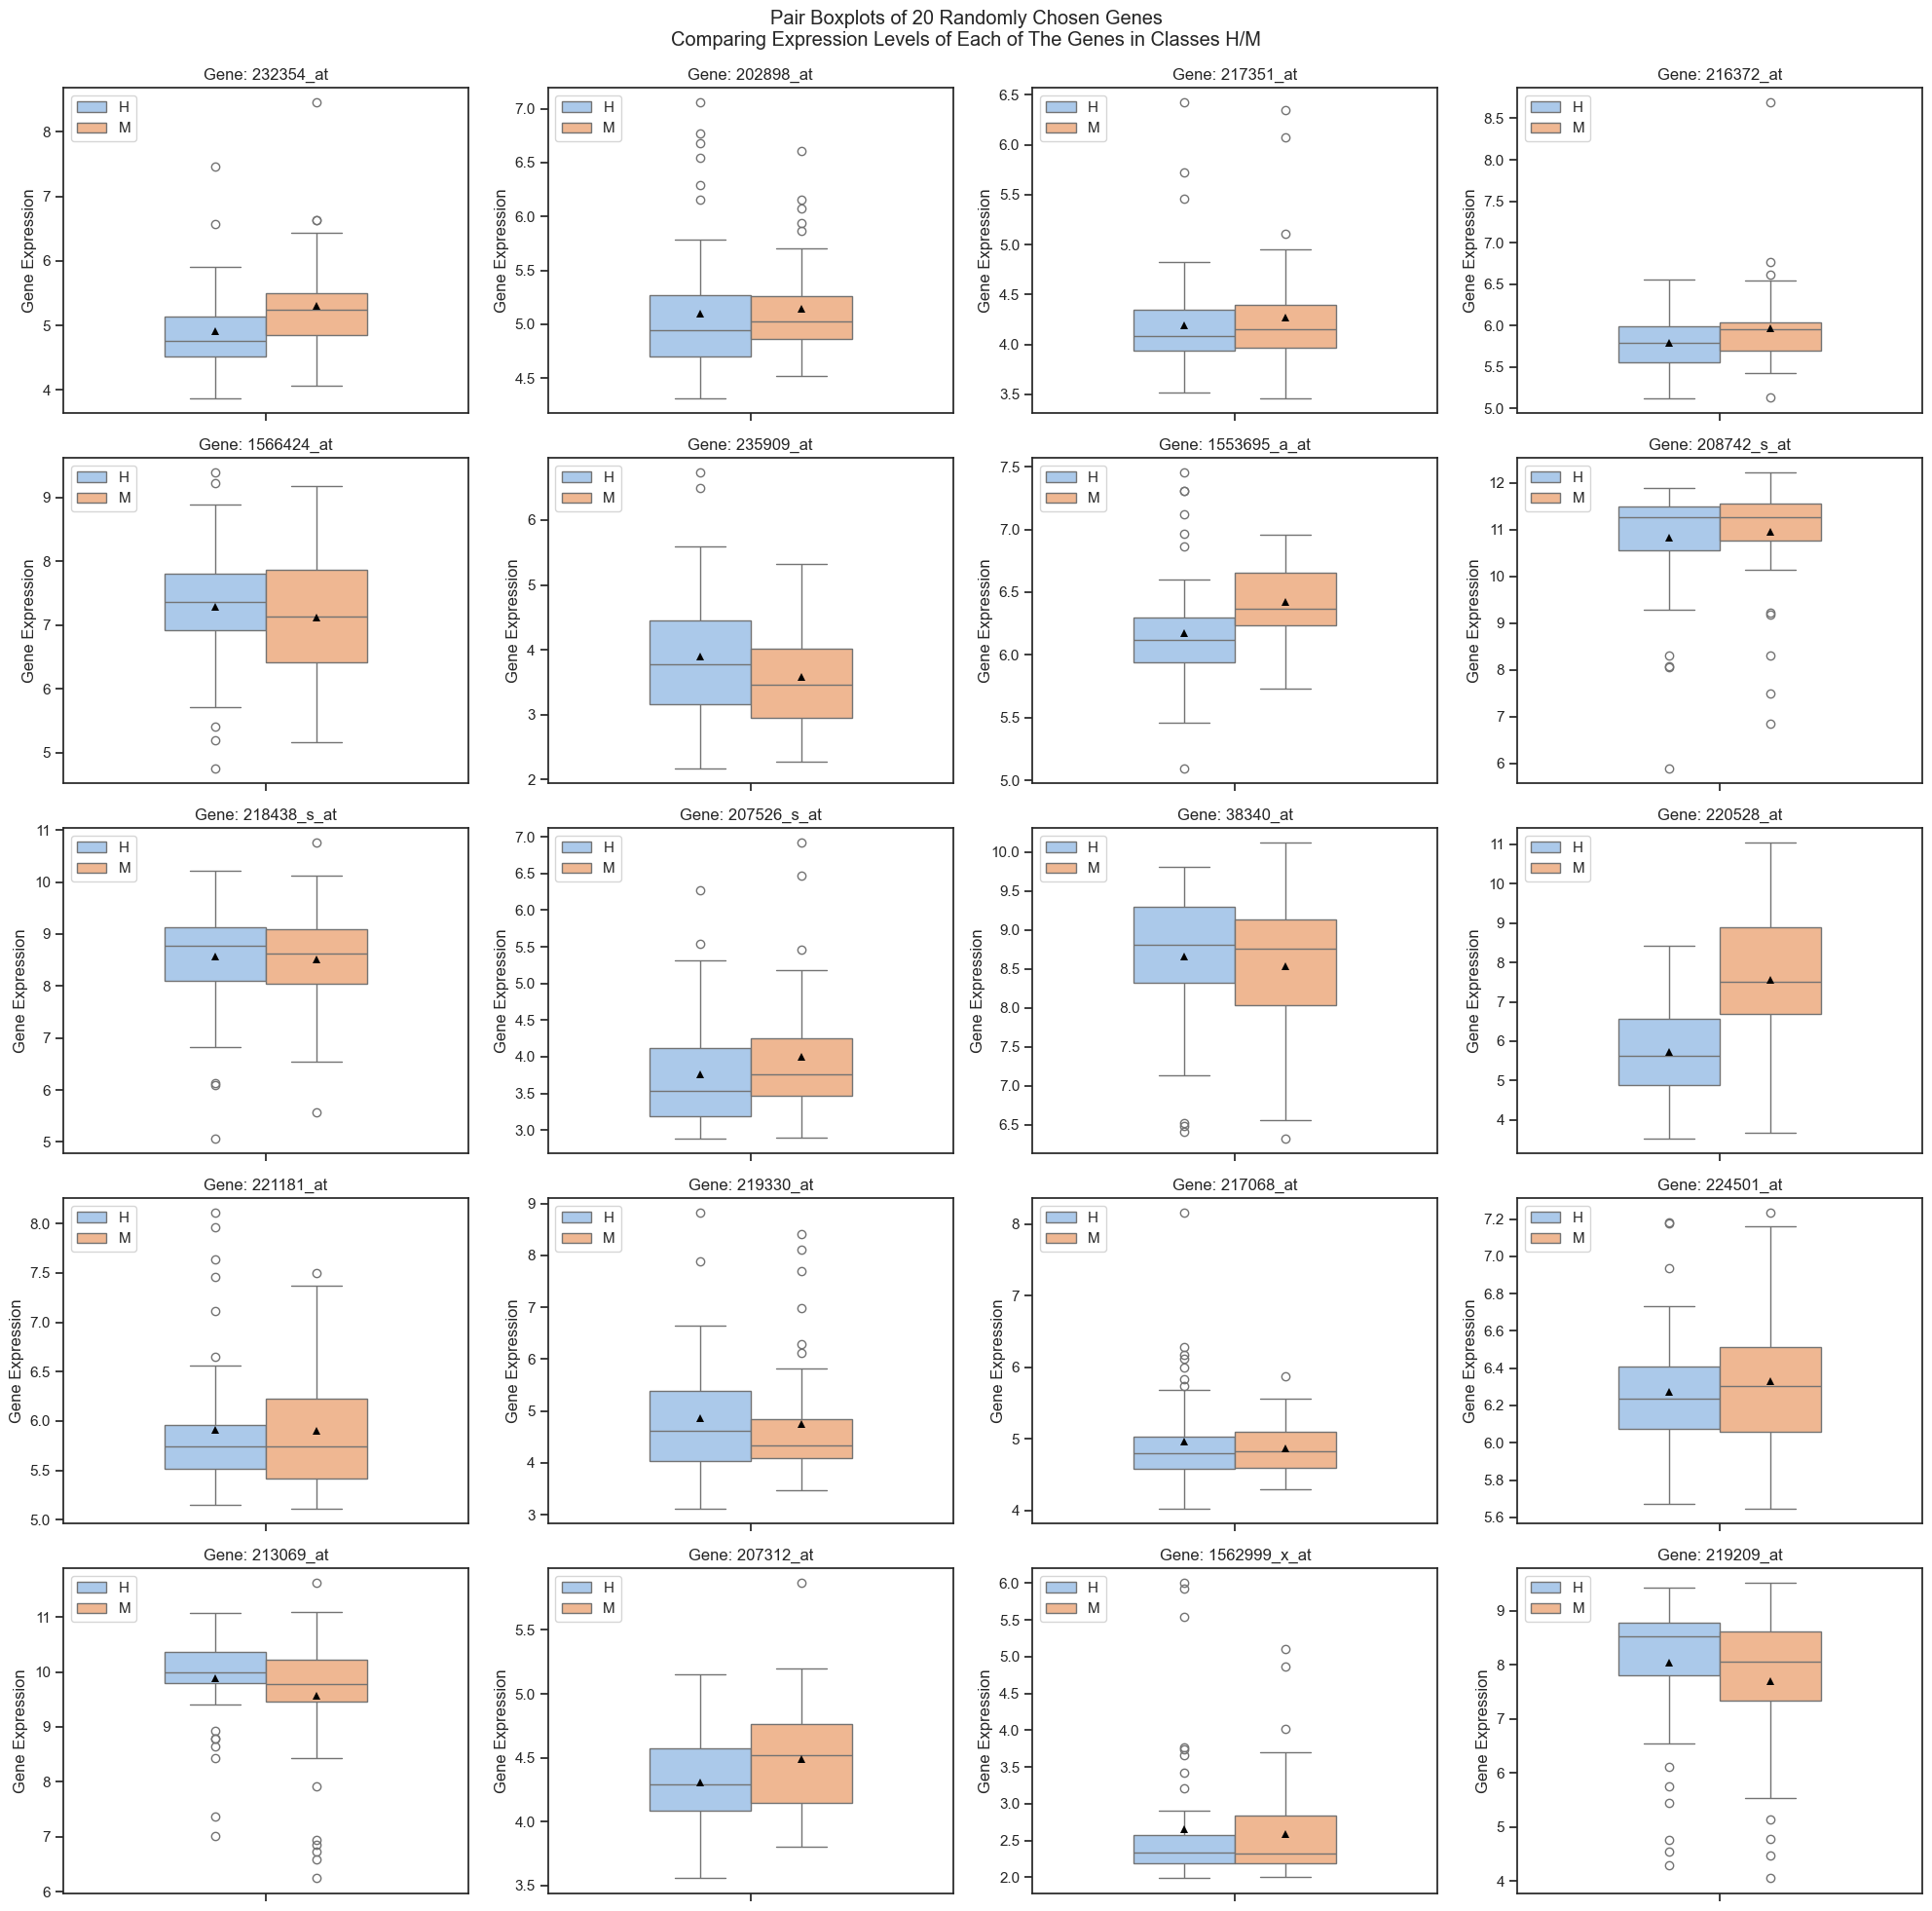

In [8]:
# Should I print values of quartiles, mean etc.?
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

all_gene_names = transposed_data_frame_without_incomplete_genes.columns
selected_genes = np.random.choice(all_gene_names, 20, replace=False)
selected_genes_with_label = np.insert(selected_genes, 0, "Class")
subset_data_without_incomplete_genes = transposed_data_frame_without_incomplete_genes[selected_genes_with_label]

for current_gene_name, gene in enumerate(selected_genes):
    gene_data = subset_data_without_incomplete_genes[[gene]].astype('float64')
    gene_data_with_class = pd.concat([subset_data_without_incomplete_genes["Class"], gene_data], axis=1)
    H_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "H"].astype(float)
    M_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "M"].astype(float)
    
    sns.boxplot(y=gene,
                hue="Class",
                data=gene_data_with_class, 
                ax=axes[current_gene_name], showfliers=True, showmeans=True, meanprops={"markerfacecolor":"black", "markeredgewidth":0}, width=0.5)   
     
    axes[current_gene_name].set_title(f'Gene: {gene}')
    axes[current_gene_name].set_ylabel('Gene Expression')
    axes[current_gene_name].legend(loc='upper left')

plt.suptitle("Pair Boxplots of 20 Randomly Chosen Genes\nComparing Expression Levels of Each of The Genes in Classes H/M")
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

<b>3.c</b>

In [9]:
# TODO: Check for double dataframes assignment
# TODO: duplicated - assign same rank
number_of_overexpressed_genes_in_M_using_WRS = 0
number_of_underexpressed_genes_in_M_using_WRS = 0
number_of_overexpressed_genes_in_M_using_ttest = 0
number_of_underexpressed_genes_in_M_using_ttest = 0

# Does names make sense?
WRS_overexpressed_p_values_list = []
WRS_underexpressed_p_values_list = []

M_group_transposed_data = transposed_data_frame_without_incomplete_genes[transposed_data_frame_without_incomplete_genes["Class"] == "M"]
H_group_transposed_data = transposed_data_frame_without_incomplete_genes[transposed_data_frame_without_incomplete_genes["Class"] == "H"]
for current_gene_name in transposed_data_frame_without_incomplete_genes.columns[1:]:
    current_gene_expression_for_group_M = M_group_transposed_data[current_gene_name].astype(float)
    current_gene_expression_for_group_H = H_group_transposed_data[current_gene_name].astype(float)
    
    # Does this variable (and next variables) make sense?
    WRS_overexpressed_p_value = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='greater').pvalue
    WRS_overexpressed_p_values_list.append(WRS_overexpressed_p_value)
    if WRS_overexpressed_p_value < 0.07:
        number_of_overexpressed_genes_in_M_using_WRS += 1
    
    # Will it be the same if I check for WRS_overexpressed_p_value > 0.093?
    WRS_underexpressed_p_value = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').pvalue
    WRS_underexpressed_p_values_list.append(WRS_overexpressed_p_value)
    if WRS_underexpressed_p_value < 0.07:
        number_of_underexpressed_genes_in_M_using_WRS += 1
    
    ttest_overexpressed_p_value = ttest_ind(current_gene_expression_for_group_M.astype(float), current_gene_expression_for_group_H.astype(float), alternative='greater').pvalue
    if ttest_overexpressed_p_value < 0.07:
        number_of_overexpressed_genes_in_M_using_ttest += 1
        
    ttest_underexpressed_p_value = ttest_ind(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').pvalue
    if ttest_underexpressed_p_value < 0.07:
        number_of_underexpressed_genes_in_M_using_ttest += 1



print(f'Number of overexpressed genes in M using WRS is: {number_of_overexpressed_genes_in_M_using_WRS}')
print(f'Number of underexpressed genes in M using WRS is: {number_of_underexpressed_genes_in_M_using_WRS}\n')
print(f'Number of overexpressed genes in M using ttest is: {number_of_overexpressed_genes_in_M_using_ttest}')
print(f'Number of underexpressed genes in M using ttest is: {number_of_underexpressed_genes_in_M_using_ttest}')


Number of overexpressed genes in M using WRS is: 10787
Number of underexpressed genes in M using WRS is: 10667

Number of overexpressed genes in M using ttest is: 8517
Number of underexpressed genes in M using ttest is: 8639
